# Quantum Random Walk

## Introduction

Quantum random walks are quantum analogs of classical random walks, and they exhibit quantum interference effects that can lead to different probability distributions.  We'll explore the implementation of a quantum random walk using Qiskit.

## Quantum Walk Operators

The quantum random walk involves two main operators: the coin operator (Hadamard gate) and the shift operator (controlled-phase gates). Let's define these operators mathematically:

### Coin Operator

The Hadamard coin operator is represented by the Hadamard gate (H). It acts on a qubit and prepares a superposition of states:

$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$

### Shift Operator

The shift operator induces conditional phase shifts based on the state of neighboring qubits. In the context of a 1D quantum random walk, controlled-phase gates (CP) are used:

$$
CP(\theta) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{bmatrix}
$$

The shift operator can be represented as a product of these gates.

## Quantum Circuit Overview

Now, let's understand the quantum circuit implemented in the code:

1. **Initialization:** The walker is initialized at position 0 using a Hadamard gate.

2. **Quantum Random Walk:**
    - Coin Operator: Hadamard gates are applied to all qubits to simulate the coin operator.
    - Shift Operator: Controlled-phase gates are applied to simulate the shift operator.

3. **Visualization Gates:** Barriers are added for visualization purposes.

4. **Measurement:** The final state of the quantum random walk is measured.

## Code Implementation


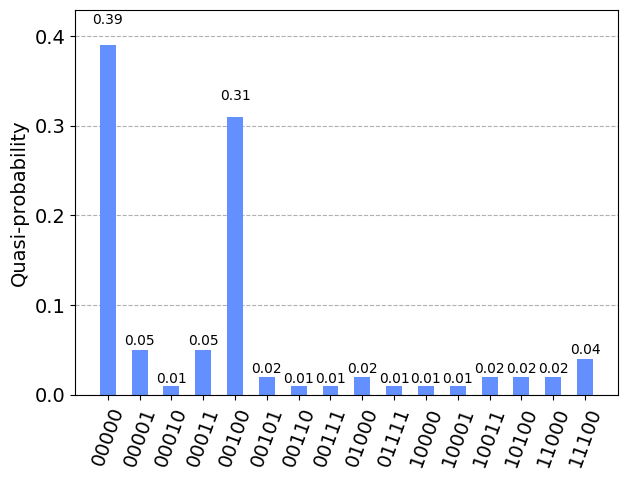

In [30]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def quantum_random_walk(num_steps):
    
    n = num_steps * 2 + 1  # number of q bits for walk 
    qr = QuantumCircuit(n, n)
    qr.h(n // 2)
    for step in range(num_steps):
        
        qr.h(range(n)) # coin operator 
        for i in range(n - 1): # shift operator 
            qr.cp(-1.0, i, i + 1)
        qr.barrier()

    qr.measure(range(n), range(n)) # final state measurement collab of superposition 

    return qr

num_steps = 2
qc = quantum_random_walk(num_steps)
simulator = Aer.get_backend('qasm_simulator')
tqc = transpile(qc, simulator)
result = simulator.run(tqc, shots=100).result()  
# we normalize the count for probabilites 
counts = result.get_counts(qc)
total_shots = sum(counts.values())
probabilities = {state: count / total_shots for state, count in counts.items()}
plot_histogram(probabilities)



# Classical Random Walk vs Quantum Random Walk

## Classical Random Walk

A classical random walk is a stochastic process where a walker takes steps in either the positive or negative direction with equal probability. The walker's position evolves over time based on random steps. In a classical random walk:

1. **Probabilistic Evolution:**
   - The walker moves left or right with a certain probability at each step.
   - The probability distribution follows classical rules, and the walker's position is described by a binomial distribution.

2. **Independent Steps:**
   - Each step is independent of the previous steps, and the overall trajectory is a result of cumulative random steps.

3. **Gaussian Distribution:**
   - As the number of steps increases, the classical random walk converges to a Gaussian distribution due to the central limit theorem.

## Quantum Random Walk

A quantum random walk is a quantum analog of a classical random walk, incorporating quantum superposition and interference effects. In a quantum random walk:

1. **Superposition of States:**
   - The walker is in a superposition of states, allowing it to explore multiple paths simultaneously.
   - Quantum gates, such as Hadamard gates, create superposition states, representing different possibilities.

2. **Entangled Steps:**
   - Quantum random walks involve entangled steps, where the state of one qubit depends on the state of neighboring qubits.
   - Controlled-phase gates create entanglement, influencing the evolution of the walker's state.

3. **Interference Effects:**
   - Quantum interference leads to constructive or destructive interference between different paths, affecting the final probability distribution.
   - Interference can amplify or diminish the probability amplitudes of different states.

4. **Non-Gaussian Distributions:**
   - Quantum random walks do not necessarily follow a Gaussian distribution. The interference effects can lead to non-classical probability distributions.

## Searching the Node in graph

So an important result of classical vs quantum random walk is if we run a search algorithm , In case of quantum random walk the algorithm explores the path in superpositon and we have $$ O(\sqrt(N)) $$ time complexty on complete graph while in case of Classical random walk we have 
   O(N).